In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "brazil"        "brics-dataset"

In [2]:
library(tidyverse)
library(readr)

In [3]:
data <- read_csv("../input/brics-dataset/India.csv")

Rows: 12744 Columns: 2

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): DEXINUS
date (1): DATE


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [4]:
typeof(data)

[1] "list"

In [5]:
spec(data)

cols(
  DATE = col_date(format = ""),
  DEXINUS = col_character()
)

In [6]:
del_data = data[data$DATE <= as.Date("1999-12-31", "%Y-%m-%d"), ] 
data = data[data$DATE > as.Date("1999-12-31", "%Y-%m-%d"), ]

In [7]:
data = data[data$DEXINUS != '.', ]

In [8]:
lengths(data)

DATE DEXINUS 
   5481    5481

In [9]:
data

DATE,DEXINUS
<date>,<chr>
2000-01-03,43.55
2000-01-04,43.55
2000-01-05,43.55
2000-01-06,43.55
2000-01-07,43.55
2000-01-10,43.55
2000-01-11,43.60
2000-01-12,43.60
2000-01-13,43.55


In [10]:
date1 = as.Date("1999-12-31", "%Y-%m-%d")
date2 = data$DATE[length(data$DATE)]     #lengthof data is 5482

In [11]:
length = date2 - date1 #7980
length

Time difference of 7980 days

In [12]:
lst_val = 1:length
lst_val <- as.double(lst_val)

In [13]:
check_date = as.Date("2000-01-01", "%Y-%m-%d")
start_val = del_data$DEXINUS[length(del_data$DATE)]

In [14]:
if(check_date != data$DATE[1]){
    num_missing = data$DATE[1] - check_date
    val = as.numeric(start_val) + as.numeric(data$DEXINUS[1])
    val = val/2
    for(i in 1:num_missing){
        lst_val[i] = val
    }
    check_date <- check_date + num_missing
}

In [15]:
lst_val[3]

[1] 3

In [16]:
idx = 3
for (i in 1:length(data$DATE)){    
    if(check_date != data$DATE[i]){
        num_missing <- data$DATE[i] - check_date
        val <- as.numeric(data$DEXINUS[i-1]) + as.numeric(data$DEXINUS[i])
        val <- val/2
        for(j in (idx : (idx + as.numeric(num_missing-1)))){
#             print(j)
            lst_val[j] <- val
        }
        
        idx <- idx + as.numeric(num_missing)
        lst_val[idx] <- as.numeric(data$DEXINUS[i])
        idx <- idx + 1
        check_date <- check_date + num_missing + 1
#         print(check_date)
    }
    
    else{
        lst_val[idx] <- as.numeric(data$DEXINUS[i])
        idx <- idx + 1
        check_date <- check_date + 1
    }
}

In [17]:
lst_val

[1] 43.5300 43.5300 43.5500 43.5500 43.5500 43.5500 43.5500 43.5500 43.5500
  [10] 43.5500 43.6000 43.6000 43.5500 43.5500 43.5750 43.5750 43.5750 43.6000
  [19] 43.6000 43.6000 43.6000 43.6100 43.6100 43.6200 43.5900 43.6500 43.6300
  [28] 43.6500 43.6500 43.6500 43.6500 43.6200 43.6500 43.6500 43.6500 43.6450
  [37] 43.6450 43.6400 43.6300 43.6500 43.5800 43.6500 43.6500 43.6500 43.6500
  [46] 43.6400 43.7500 43.6800 43.6800 43.6650 43.6650 43.6650 43.6500 43.6800
  [55] 43.6500 43.6500 43.6650 43.6650 43.6800 43.6500 43.6300 43.6500 43.6500
  [64] 43.6400 43.6400 43.6300 43.6300 43.6500 43.6300 43.6500 43.6500 43.6500
  [73] 43.6500 43.6400 43.6500 43.5800 43.6500 43.6400 43.6400 43.6300 43.5900
  [82] 43.6500 43.6500 43.6500 43.6350 43.6350 43.6200 43.6500 43.6500 43.6500
  [91] 43.6500 43.6410 43.6410 43.6320 43.6500 43.6800 43.6500 43.6700 43.6650
 [100] 43.6650 43.6600 43.6800 43.7000 43.7000 43.7500 43.7150 43.7150 43.6800
 [109] 43.7000 43.7000 43.6870 43.7000 43.6775 43.6775 43.6550 43.7000 43.7000
 [118] 43.7000 43.7000 43.6850 43.6850 43.6700 43.7500 43.7300 43.6700 43.7000
 [127] 43.7000 43.7000 43.7000 43.7000 44.3000 44.4400 44.1500 44.2950 44.2950
 [136] 44.4400 44.0500 44.0200 44.0300 44.0000 44.0100 44.0100 44.0200 44.1500
 [145] 44.2500 44.2000 44.4000 44.5250 44.5250 44.5250 44.6500 44.6500 44.6500
 [154] 44.7000 44.7250 44.7250 44.7500 44.7500 44.8300 44.8500 44.8500 44.8500
 [163] 44.8500 44.8500 44.8000 44.7200 44.8000 44.8300 44.8400 44.8400 44.8500
 [172] 44.7500 44.7000 44.7000 44.7500 44.7500 44.7500 44.7500 44.7000 44.7200
 [181] 44.7300 44.7000 44.7100 44.7100 44.7200 44.7050 44.6900 44.8100 44.7800
 [190] 44.7650 44.7650 44.7500 44.7500 44.7500 44.7800 44.7800 44.7600 44.7600
 [199] 44.7400 44.8300 44.8500 45.0200 44.8000 44.7850 44.7850 44.7700 44.9500
 [208] 44.9800 44.9500 44.9600 45.0550 45.0550 45.1500 45.1500 45.4000 45.4000
 [217] 45.4000 45.5100 45.5100 45.6200 45.8000 45.7000 45.9000 45.9000 45.8750
 [226] 45.8750 45.8500 45.8000 45.8000 45.9500 45.9000 45.8150 45.8150 45.7300
 [235] 45.7500 45.9000 46.0500 46.0500 45.9400 45.9400 45.8300 46.0000 45.9000
 [244] 45.9000 45.8000 45.7700 45.7700 45.7700 45.7400 45.6500 46.0500 45.7300
 [253] 45.6900 45.6900 45.6500 45.7000 45.7000 45.8000 45.8500 46.0000 46.0000
 [262] 46.1500 46.4500 46.3000 46.0900 46.1800 46.1700 46.1700 46.1600 46.1000
 [271] 46.1500 46.0500 46.0600 46.0800 46.0800 46.1000 46.1800 46.1700 46.1700
 [280] 46.1700 46.2100 46.2100 46.2100 46.2500 46.3500 46.3000 46.4500 46.4250
 [289] 46.4250 46.4000 46.3500 46.4500 46.4000 46.4000 46.4250 46.4250 46.4500
 [298] 46.4800 46.7000 46.7000 46.7800 46.7800 46.7800 46.7800 46.9000 46.8200
 [307] 46.8500 46.7000 46.6700 46.6700 46.6400 46.7000 46.7200 46.7500 46.7800
 [316] 46.7750 46.7750 46.7700 46.8500 46.8300 46.8500 46.8200 46.8600 46.8600
 [325] 46.9000 46.8500 46.8600 46.8850 46.9100 46.9050 46.9050 46.9000 46.9300
 [334] 46.9500 46.8700 46.8900 46.8850 46.8850 46.8800 46.8000 46.7800 46.8000
 [343] 46.8000 46.7900 46.7900 46.7800 46.7800 46.8000 46.8000 46.8000 46.7950
 [352] 46.7950 46.7900 46.7500 46.7500 46.7400 46.7700 46.7600 46.7600 46.7600
 [361] 46.7500 46.7300 46.7500 46.7500 46.7450 46.7450 46.7450 46.7400 46.7500
 [370] 46.7800 46.7600 46.7450 46.7450 46.7300 46.6800 46.6800 46.6800 47.4700
 [379] 47.0100 47.0100 47.0100 46.5500 46.4800 46.4500 46.4300 46.4300 46.4300
 [388] 46.4300 46.3900 46.4200 46.5400 46.5300 46.5150 46.5150 46.5000 46.4600
 [397] 46.4400 46.4100 46.4400 46.4350 46.4350 46.4300 46.4200 46.4600 46.4600
 [406] 46.5400 46.5500 46.5500 46.5600 46.6000 46.6500 46.6300 46.5500 46.6050
 [415] 46.6050 46.6050 46.6600 46.6500 46.6300 46.6500 46.6550 46.6550 46.6600
 [424] 46.6800 46.5900 46.5900 46.5900 46.5800 46.5800 46.5700 46.5300 46.5700
 [433] 46.5600 46.5500 46.5600 46.5600 46.5700 46.7000 46.6900 46.6600 46.6900
 [442] 46.7050 46.7050 46.7200 46.7100 46.7100 46.7400 46.7200 46.7050 46.7050
 [451] 46.6900 46.6500 46.6500 46.6600 46.8500 46.750

In [18]:
print("Enter 0 if you want the test data to start from 2020 and 1 if you want the test data to start from 2021")
offset = readline()
offset = as.integer(offset)

[1] "Enter 0 if you want the test data to start from 2020 and 1 if you want the test data to start from 2021"


 1


In [19]:
test_date = as.Date("2021-01-01", "%Y-%m-%d")
if(offset == 0){
    test_date = as.Date("2020-01-01", "%Y-%m-%d")
}

In [20]:
train = lst_val[1: as.numeric(test_date - date1) - 1]

In [21]:
test = lst_val[as.numeric(test_date - date1) : length(lst_val)]

In [22]:
train_week <- list(1 : ceiling(length(train)/7))
for(i in 0 : as.integer(length(train)/7)){
    if(i == as.integer(length(train)/7)){
        train_week[i+1] <- mean(train[((7*i)+1) : (length(train))])
        next
    }

    train_week[i+1] <- mean(train[((7*i)+1) : ((7*i)+7)])
}

In [23]:
test_week <- list(1 : ceiling(length(test)/7))

for(i in 0 : as.integer(length(test)/7)){
    if(i == as.integer(length(test)/7)){
        test_week[i+1] <- mean(test[((7*i)+1) : (length(test))])
        next
    }

    test_week[i+1] <- mean(test[((7*i)+1) : ((7*i)+7)])
}

In [24]:
train <- ts(as.numeric(train_week))
test <- ts(as.numeric(test_week), start = length(train_week)+1,
           end = (length(train_week) + length(test_week)))
#converting to time series

In [25]:
install.packages("WaveletArima")
library(WaveletArima)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [26]:
library(tseries)
library(forecast)
library(Metrics)
library(ggplot2)
library(readr)
# library(WaveletArima)
library(caret)
library(nnfor)
library(tsDyn)
library(fracdiff)
library(bsts)
library(forecastHybrid)
library(e1071)
library(tseriesChaos)
library(pracma)
library(Kendall)
# library(nonlinearTseries)
# library(GeneCycle)
library(fpp2)
library(lmtest)


Attaching package: ‘Metrics’


The following object is masked from ‘package:forecast’:

    accuracy


Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:Metrics’:

    precision, recall


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress


Registered S3 method overwritten by 'greybox':
  method     from
  print.pcor lava


Attaching package: ‘tsDyn’


The following object is masked from ‘package:Metrics’:

    mse


Loading required package: BoomSpikeSlab

Loading required package: Boom

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘Boom’


The following object is masked from ‘package:stats’:

    rWishart



Attaching package: ‘BoomSpikeSlab’


The following object is masked from ‘package:stats’:

    knots


Loading required package: zoo


A

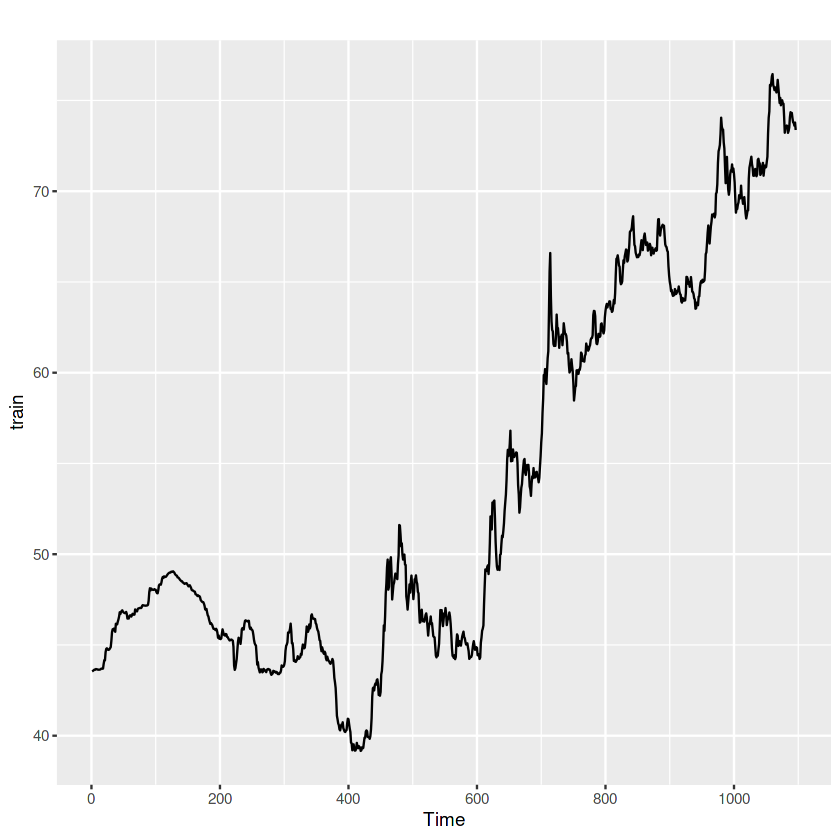

In [27]:
autoplot(train)

In [28]:
#ACF & PACF plots
#diffcase=ndiffs(train)
diffset = diff(train, differences = ndiffs(train))

jpeg(file="ACF_India.jpeg")
ggAcf(diffset) +
  ggtitle("ACF plot")
dev.off()

jpeg(file="PACF_India.jpeg")

ggPacf(train) +
  ggtitle("PACF plot")
dev.off()

png 
  2

png 
  2

In [29]:
kpss.test(train)  #p value is < 0.05... So,reject null hypothesis and accept alternative hypothisis which is non stationary 

Warning message in kpss.test(train):
“p-value smaller than printed p-value”



	KPSS Test for Level Stationarity

data:  train
KPSS Level = 11.325, Truncation lag parameter = 7, p-value = 0.01


In [30]:
Box.test(train,type="Ljung-Box")  #p<0.01... So, no seriel correlation exists


	Box-Ljung test

data:  train
X-squared = 1093, df = 1, p-value < 2.2e-16


In [31]:
skewness(train)   #Right Skew

[1] 0.5744544

In [32]:
kurtosis(train)   #Peaked distribution

[1] -1.150556

In [33]:
hurstexp(train)  #Which exponent to consider  #Emperical

Simple R/S Hurst estimation:         0.8858326 
Corrected R over S Hurst exponent:   1.014855 
Empirical Hurst exponent:            0.972047 
Corrected empirical Hurst exponent:  0.9535084 
Theoretical Hurst exponent:          0.5381524 


In [34]:
terasvirta.test(train) 
#Also a test for linearity... p-value is greater than 0.05, hence linear trend


	Teraesvirta Neural Network Test

data:  train
X-squared = 2.6273, df = 2, p-value = 0.2688


In [35]:
#Non-Chaotic
max_lyapunov_expo <-lyap_k(train, m=1, d=2, s=1, t=4, ref=length(train), k=2, eps=4); max_lyapunov_expo

Finding nearests
Keeping  1096  reference points
Following points


A Time Series:
[1] -4.185234

# **Models**


z test of coefficients:

      Estimate Std. Error z value Pr(>|z|)    
ma1   0.341553   0.029875 11.4327  < 2e-16 ***
ma2   0.055922   0.029796  1.8768  0.06055 .  
drift 0.027186   0.015944  1.7052  0.08817 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Series: train 
ARIMA(0,1,2) with drift 

Coefficients:
         ma1     ma2   drift
      0.3416  0.0559  0.0272
s.e.  0.0299  0.0298  0.0159

sigma^2 estimated as 0.143:  log likelihood=-487.47
AIC=982.94   AICc=982.98   BIC=1002.93

Training set error measures:
                       ME      RMSE       MAE          MPE      MAPE      MASE
Training set -4.22526e-05 0.3774702 0.2485431 -0.004860718 0.4561081 0.9547174
                    ACF1
Training set 0.002569767

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.0000422526,0.3774702,0.2485431,-0.004860718,0.4561081,0.9547174,0.002569767,NA
Test set,-0.0655618442,0.6384098,0.5389757,-0.097296998,0.7308971,2.0703432,0.774016195,1.494236


[1] 0.007305133

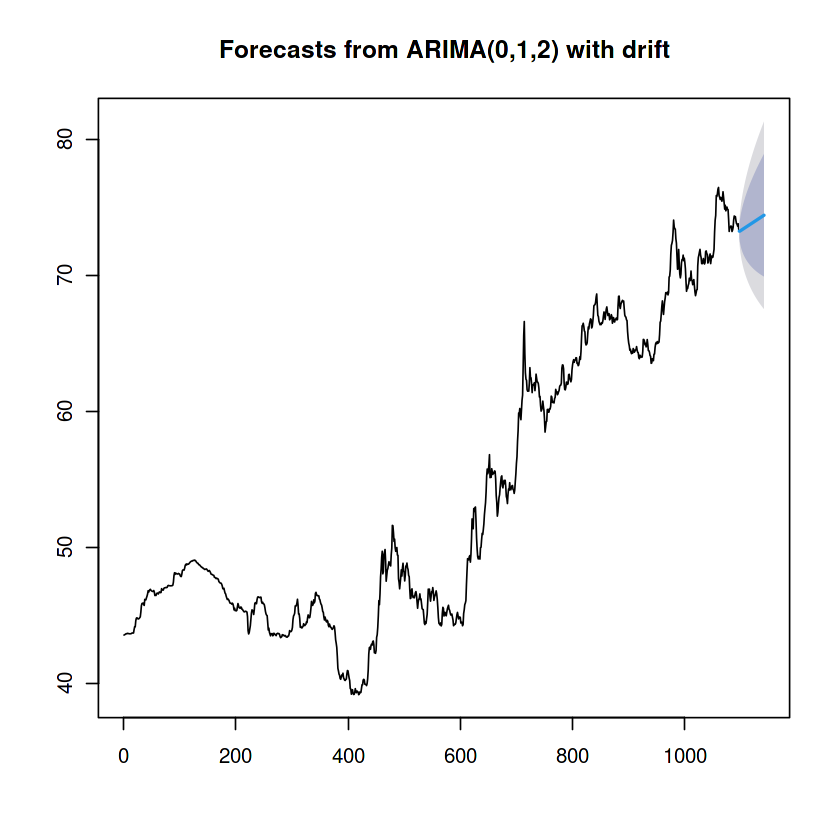

In [37]:
#ARIMA - Classical
fitARIMA = auto.arima(train)
coeftest(fitARIMA)
summary(fitARIMA)
predARIMA = forecast::forecast(fitARIMA,h=length(test))
plot(predARIMA)

a1<-forecast::accuracy(predARIMA, test);a1
smape(test,predARIMA$mean)

In [38]:
library(stringi)
lag = stri_count(toString(summary(fitARIMA)[1]), fixed="ar")

ETS(M,Ad,N) 

Call:
 ets(y = train) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.3076 
    phi   = 0.8003 

  Initial states:
    l = 43.2191 
    b = -0.1204 

  sigma:  0.007

     AIC     AICc      BIC 
5502.464 5502.541 5532.461 

Training set error measures:
                     ME      RMSE       MAE        MPE      MAPE      MASE
Training set 0.01232115 0.3880803 0.2546201 0.02180863 0.4668297 0.9780607
                  ACF1
Training set 0.1098417

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.01232115,0.3880803,0.2546201,0.02180863,0.4668297,0.9780607,0.1098417,NA
Test set,0.81969223,1.1711103,0.9214063,1.09942893,1.2393691,3.5393564,0.8507167,2.71464


[1] 0.01251553

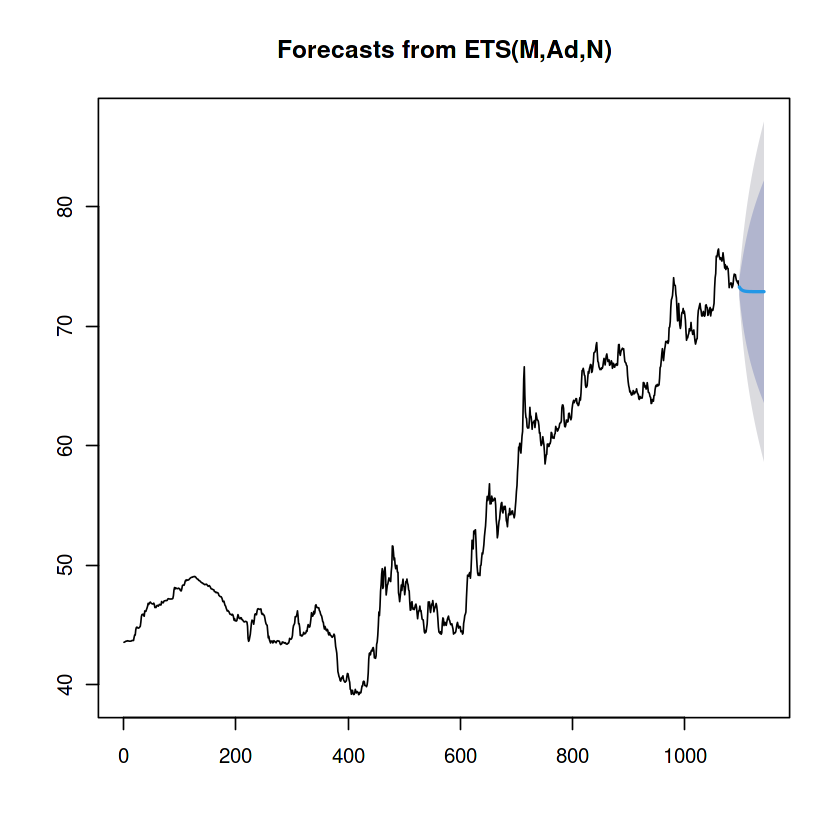

In [39]:
# fitting ETS  -- Smoothing Basic
fitETS=ets(train)
summary(fitETS)
predETS=forecast::forecast(fitETS, h=length(test))
plot(predETS)

a2<-forecast::accuracy(predETS, test);a2
smape(test,predETS$mean)

Warning message:
“Possible unit root in the low  regime. Roots are: 0.9979 2.0356 4.0758 4.0758”


,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.5203193,0.9698988,0.783133,0.6936522,1.054925,0.8529142,2.249759


[1] 0.01062194

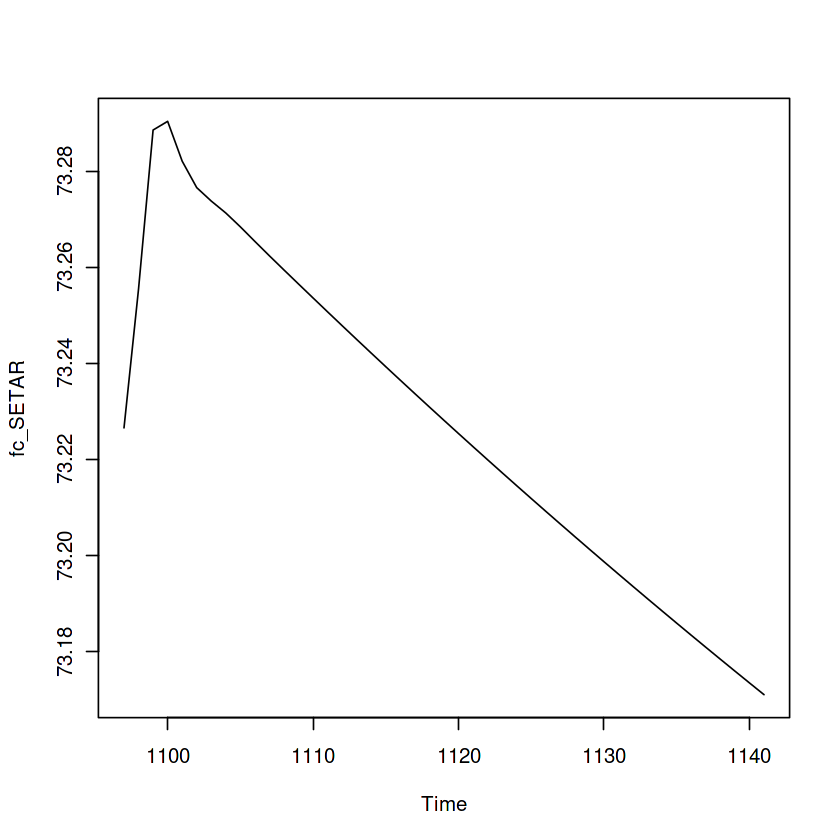

In [40]:
#SETAR - Classical
fit_SETAR = setar(train, m=4)
fc_SETAR = predict(fit_SETAR, n.ahead = length(test))
plot(fc_SETAR)
#How to determine M?

a3<-forecast::accuracy(fc_SETAR, test);a3
smape(test, fc_SETAR)

                  Length Class  Mode     
lambda               1   -none- numeric  
alpha                1   -none- numeric  
beta                 0   -none- NULL     
damping.parameter    0   -none- NULL     
gamma.values         0   -none- NULL     
ar.coefficients      0   -none- NULL     
ma.coefficients      0   -none- NULL     
likelihood           1   -none- numeric  
optim.return.code    1   -none- numeric  
variance             1   -none- numeric  
AIC                  1   -none- numeric  
parameters           2   -none- list     
seed.states          1   -none- numeric  
fitted.values     1096   ts     numeric  
errors            1096   ts     numeric  
x                 1096   -none- numeric  
seasonal.periods     0   -none- NULL     
y                 1096   ts     numeric  
call                 2   -none- call     
series               1   -none- character
method               1   -none- character

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.01966223,0.3787111,0.2489114,0.03270059,0.4563719,0.956132,0.01310819,NA
Test set,0.53397245,0.9591286,0.7670686,0.71248082,1.0329616,2.946506,0.84594764,2.224446


[1] 0.01040256

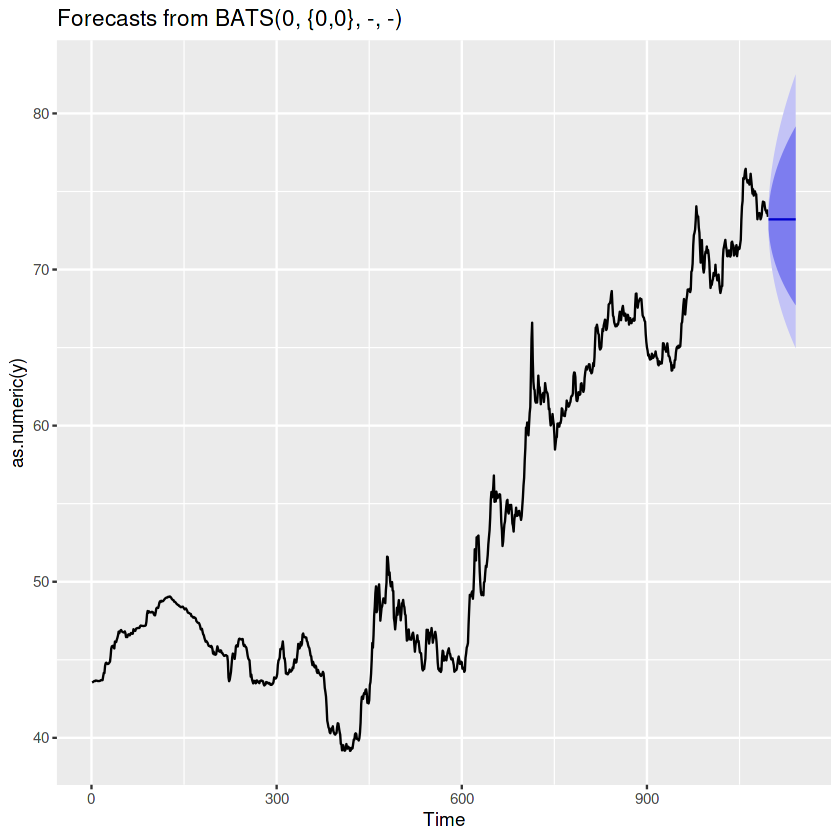

In [41]:
#TBATS - Smotthing
fit_tbats = tbats(train)
summary(fit_tbats)
predTBATS=forecast::forecast(fit_tbats, h=length(test))
autoplot(predTBATS)

a4<-forecast::accuracy(predTBATS, test);a4
smape(test,predTBATS$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.04389774,0.6951817,0.6069153,0.04960668,0.8217965,0.8085679,1.621147


[1] 0.008225619

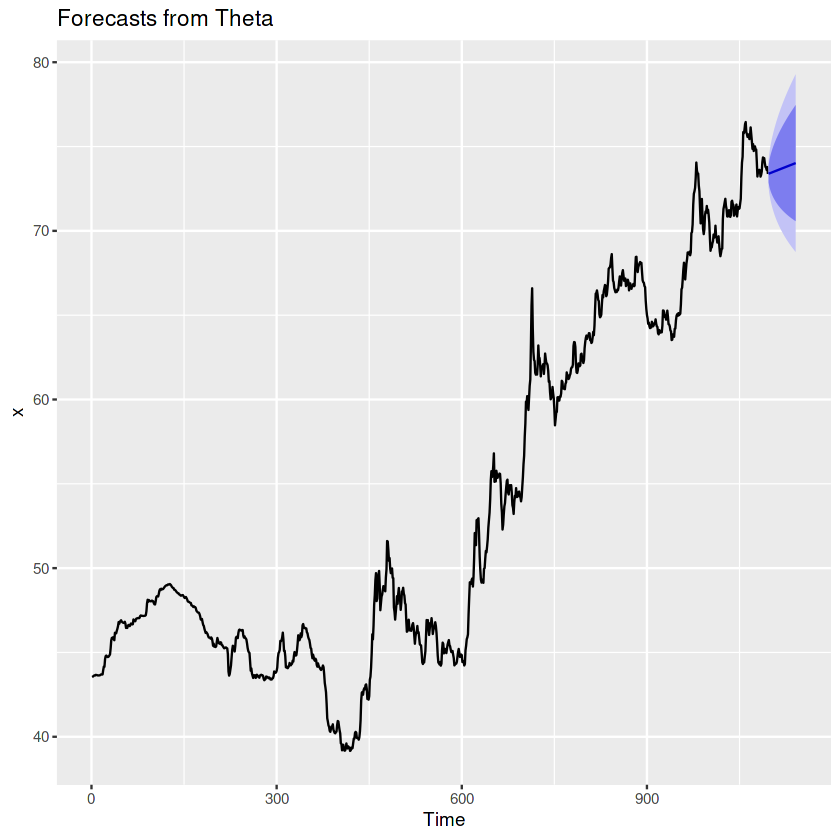

In [42]:
#Theta -- Smotthing
fit_theta=thetaf(train, h=length(test))
autoplot(fit_theta)

a5<-forecast::accuracy(fit_theta$mean, test);a5
smape(test,fit_theta$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,4.254743,4.697155,4.254743,5.745785,5.745785,0.912025,10.92904


[1] 0.0595388

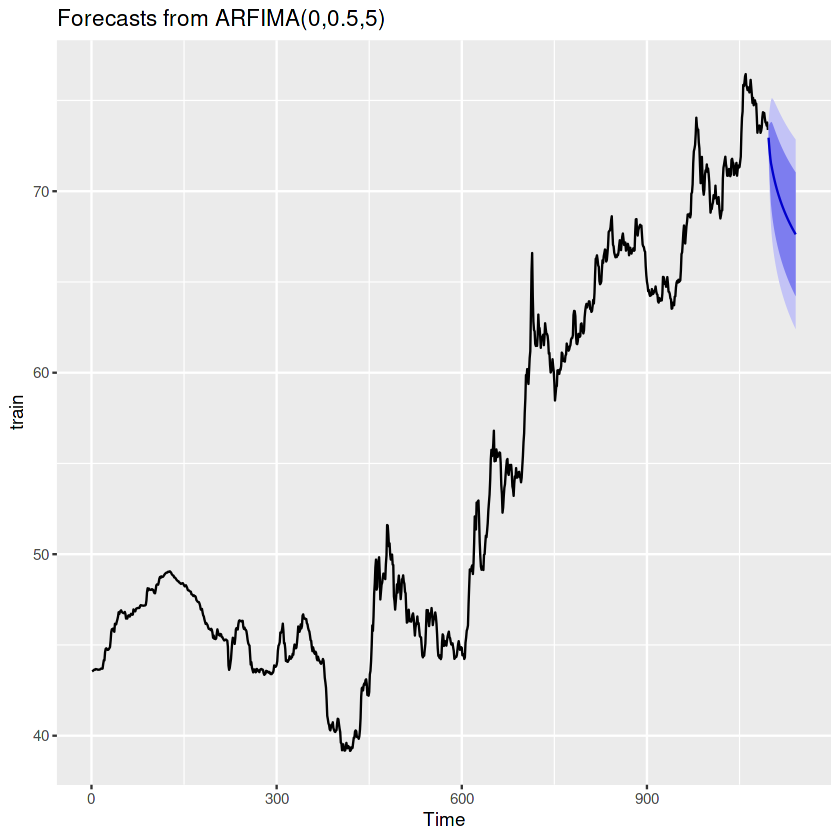

In [43]:
#ARFIMA model -- Classical
fit_ARFIMA=arfima(train)
predARFIMA = forecast::forecast(fit_ARFIMA, h=length(test))
autoplot(predARFIMA)

a6<-forecast::accuracy(predARFIMA$mean, test);a6
smape(test,predARFIMA$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.0574662,0.6339878,0.5334254,-0.08619146,0.7232443,0.7712136,1.483347


[1] 0.007229564

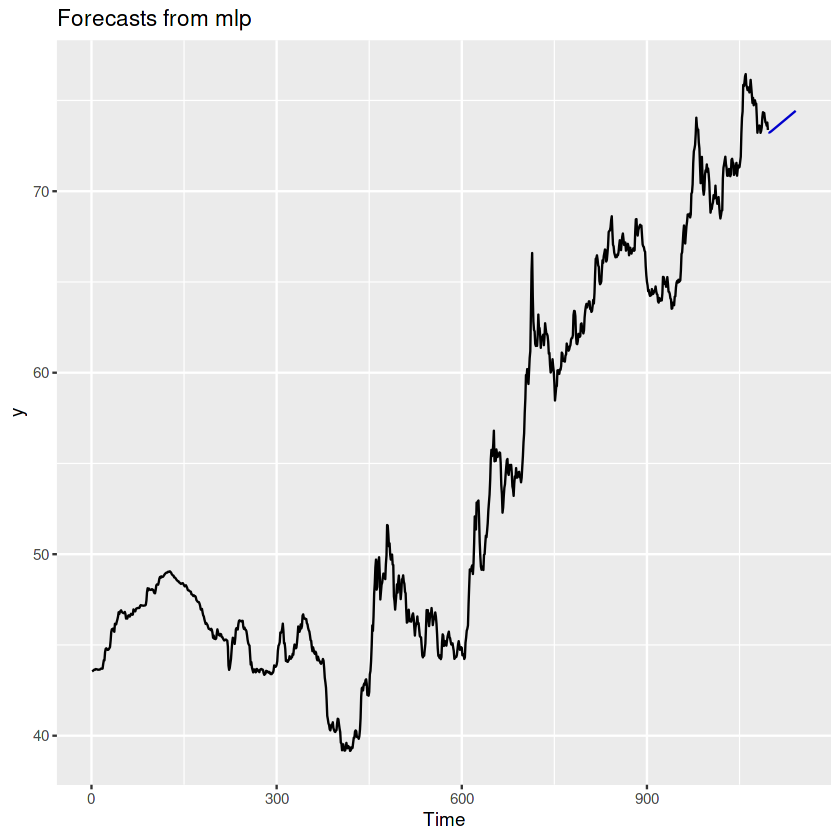

In [44]:
#fitting ANN -- ML Model
fit_ANN = mlp(train)
predANN = forecast::forecast(fit_ANN, h=length(test))
autoplot(predANN)

a7<-forecast::accuracy(predANN$mean, test);a7
smape(test,predANN$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.9237485,1.300938,1.03054,1.239472,1.386417,0.8703259,3.016106


[1] 0.01401482

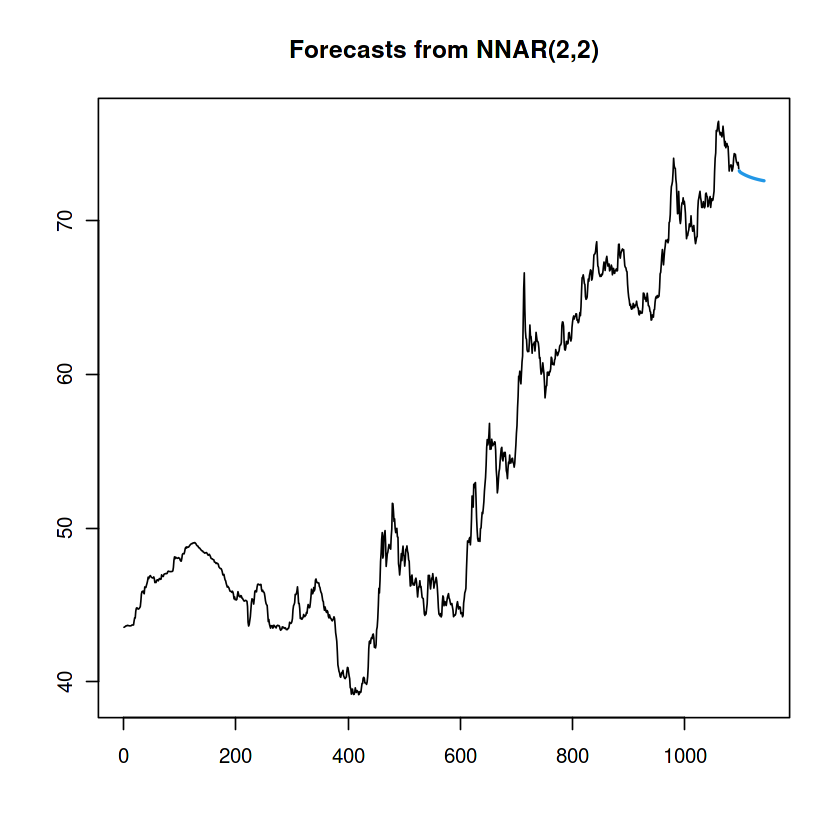

In [45]:
#fitting ARNN model -- ML Model
fit_ARNN = nnetar(train)
predARNN=forecast::forecast(fit_ARNN, h= length(test))
plot(predARNN)

a8<-forecast::accuracy(predARNN$mean, test);a8
smape(test, predARNN$mean)

Warning message in preprocess(y, m, lags, keep, difforder, sel.lag, allow.det.season, :
“No inputs left in the network after pre-selection, forcing AR(1).”


,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.06361579,0.638216,0.5388895,-0.09465841,0.7307565,0.7739954,1.493709


[1] 0.007303923

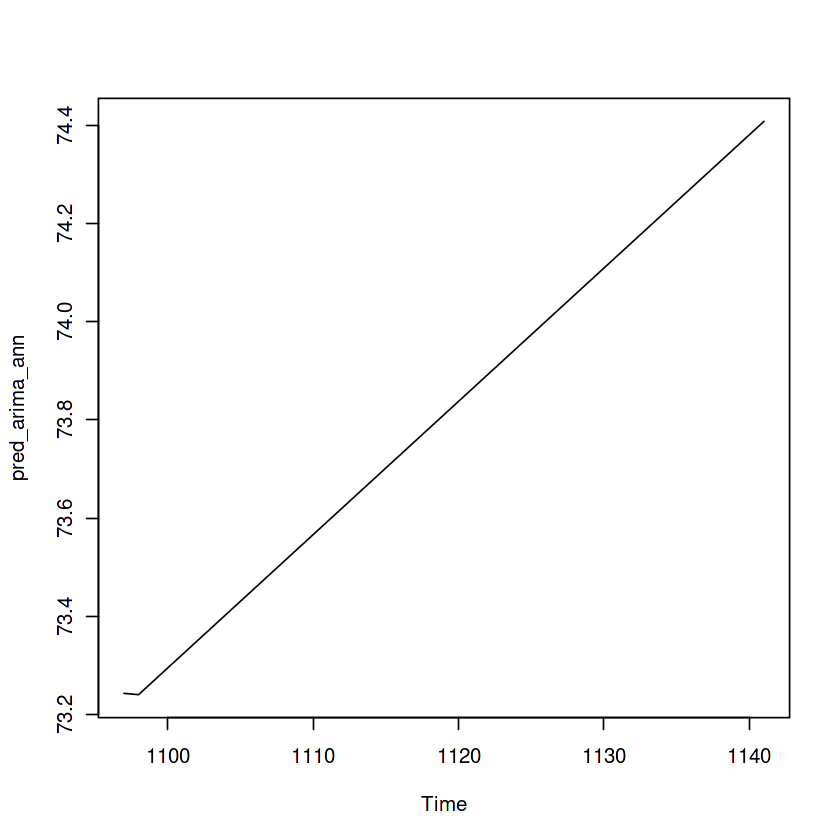

In [46]:
#fitting ARIMA + ANN hyybrid
fit_res_ANN=mlp(fitARIMA$residuals)
pred_res_ANN = forecast::forecast(fit_res_ANN, h=length(test))
pred_arima_ann=predARIMA$mean+pred_res_ANN$mean
plot(pred_arima_ann)

a9<-forecast::accuracy(pred_arima_ann, test);a9
smape(test,pred_arima_ann)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.06105526,0.6379622,0.5386674,-0.09118538,0.7304244,0.77402,1.493067


[1] 0.00730085

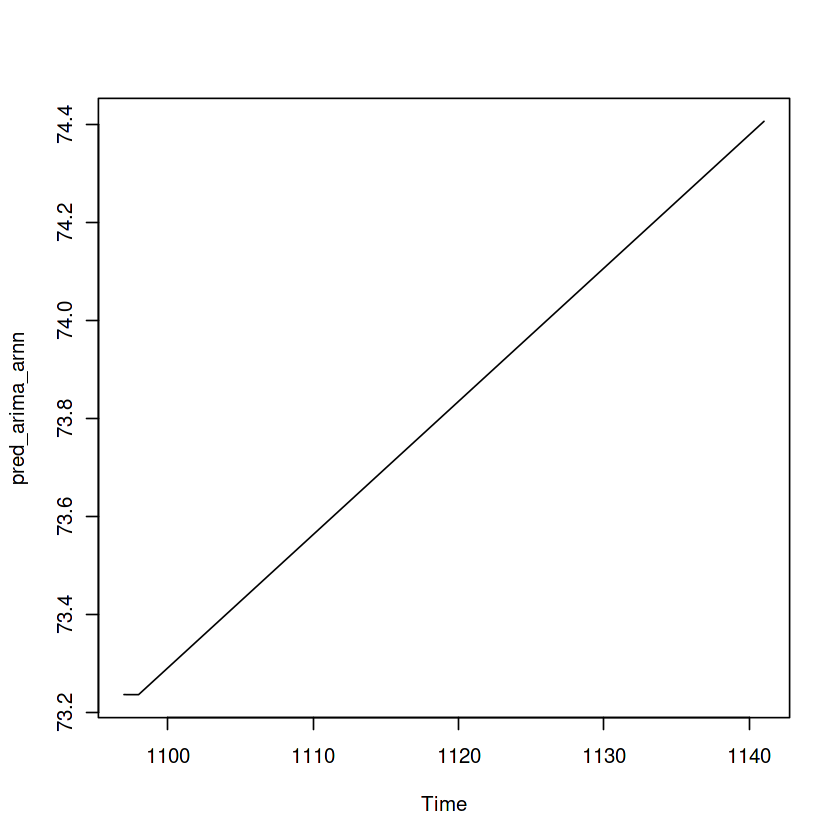

In [47]:
#fitting ARIMA + ARNN hybrid
fit_res_ARNN=nnetar(fitARIMA$residuals)
pred_res_ARNN = forecast::forecast(fit_res_ARNN, h=length(test))
pred_arima_arnn=predARIMA$mean+pred_res_ARNN$mean
plot(pred_arima_arnn)

a10<-forecast::accuracy(pred_arima_arnn, test);a10
smape(test,pred_arima_arnn)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.3394911,0.7835116,0.6333931,0.450229,0.8539336,0.8128055,1.819288


[1] 0.008581206

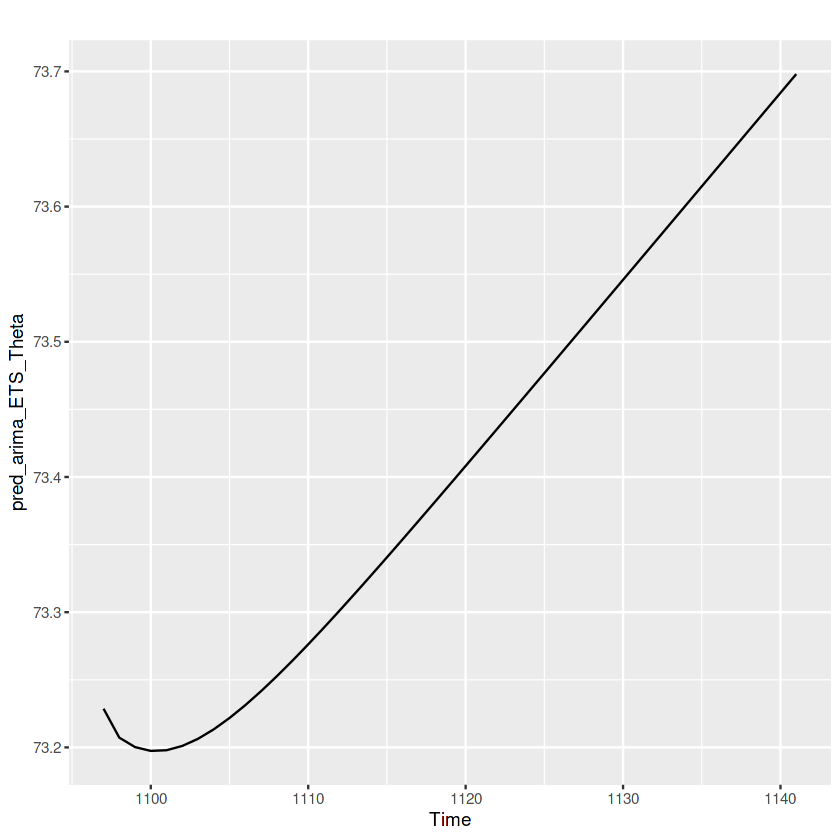

In [48]:
#ARIMA+ETS+THETA
pred_arima_ETS_Theta = ((0.333*predARIMA$mean) + (0.333*predETS$mean) + (0.333*fit_theta$mean))
autoplot(pred_arima_ETS_Theta)

a11<-forecast::accuracy(pred_arima_ETS_Theta, test);a11
smape(test,pred_arima_ETS_Theta)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.6324814,0.9979579,0.7819145,0.8464541,1.05204,0.8361444,2.313786


[1] 0.01060537

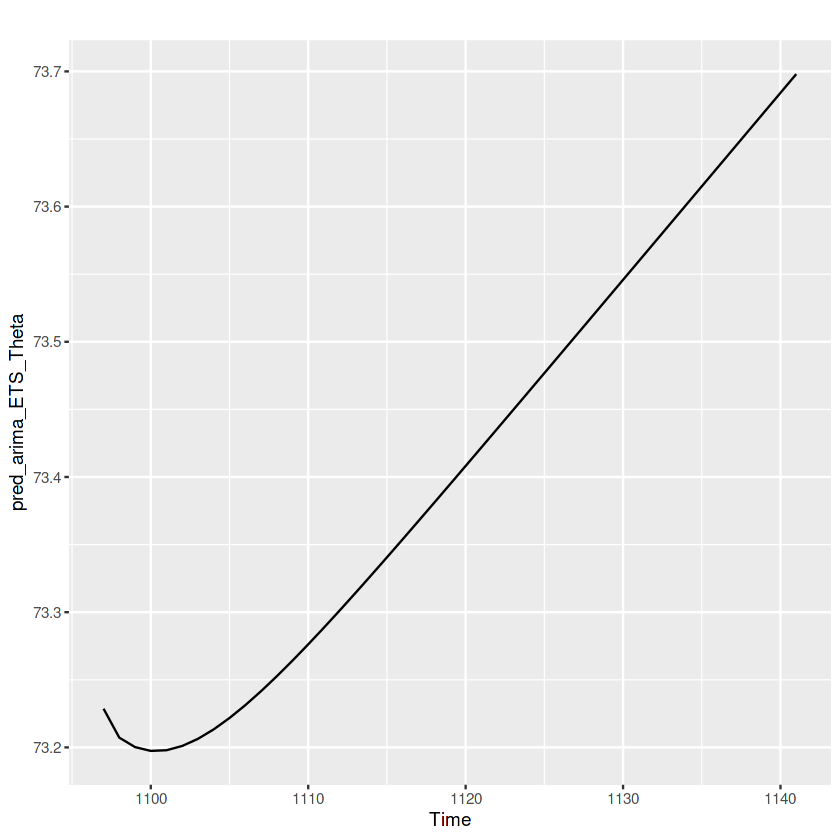

In [49]:
#ARIMA+ETS+ARNN
pred_arima_ETS_ARNN = ((0.333*predARIMA$mean) + (0.333*predETS$mean) + (0.333*predARNN$mean))
autoplot(pred_arima_ETS_Theta)

a12<-forecast::accuracy(pred_arima_ETS_ARNN, test);a12
smape(test,pred_arima_ETS_ARNN)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.3741418,0.816405,0.6588434,0.4968633,0.8880414,0.8215256,1.895263


[1] 0.008927314

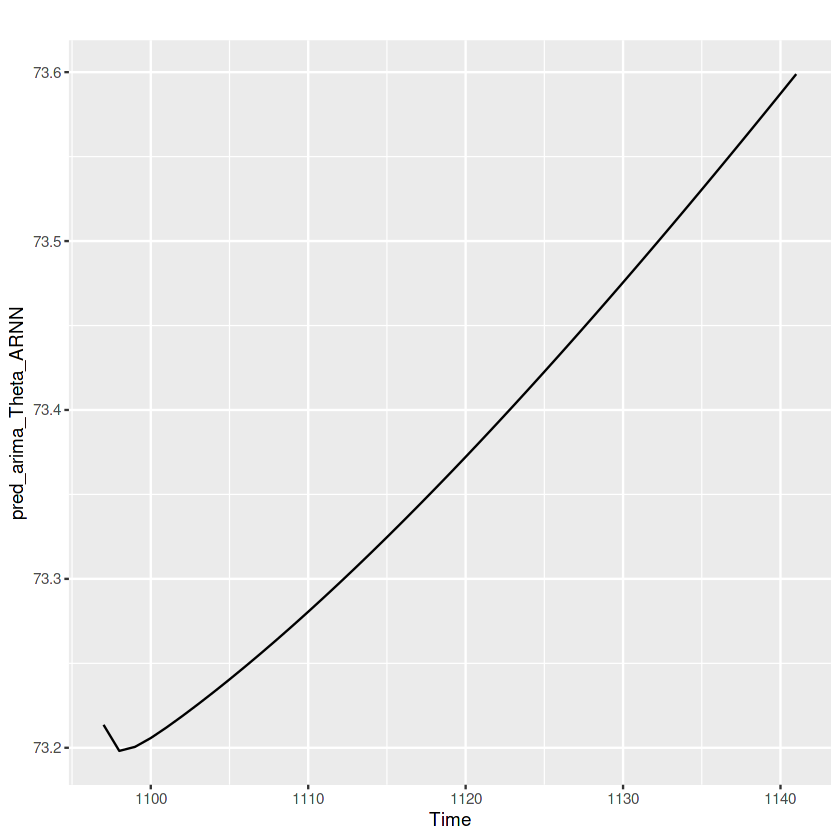

In [50]:
#ARIMA+theta+ARNN
pred_arima_Theta_ARNN = ((0.333*predARIMA$mean) + (0.333*fit_theta$mean) + (0.333*predARNN$mean))
autoplot(pred_arima_Theta_ARNN)

a13<-forecast::accuracy(pred_arima_Theta_ARNN, test);a13
smape(test,pred_arima_Theta_ARNN)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.6689315,1.047683,0.8280607,0.8953731,1.114252,0.8463217,2.428836


[1] 0.01123643

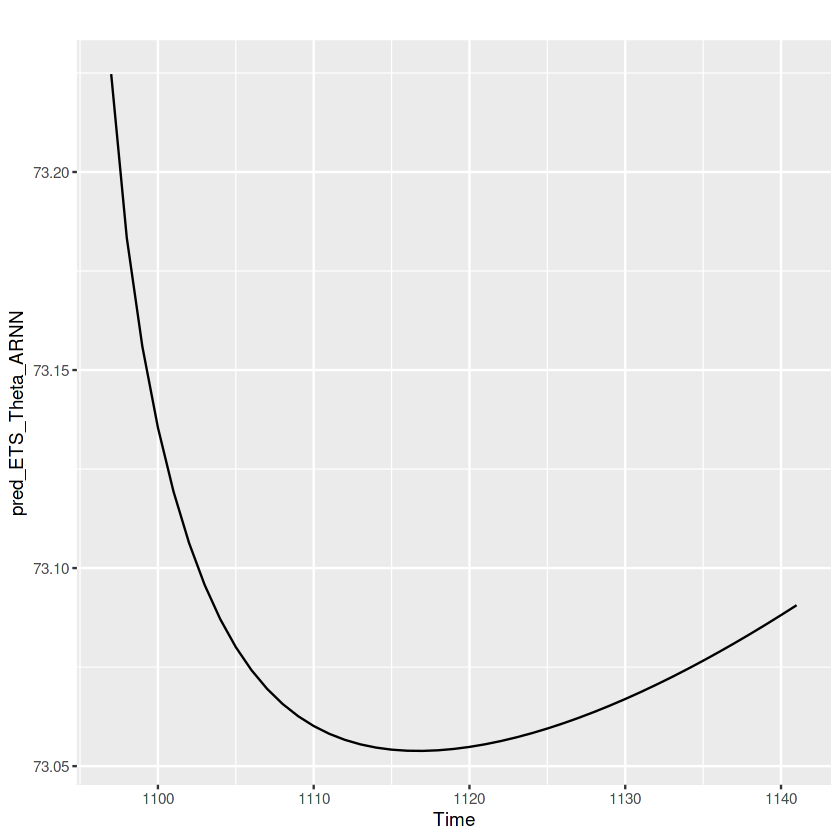

In [51]:
#ETS+theta+ARNN
pred_ETS_Theta_ARNN = ((0.333*predETS$mean) + (0.333*fit_theta$mean) + (0.333*predARNN$mean))
autoplot(pred_ETS_Theta_ARNN)

a14<-forecast::accuracy(pred_ETS_Theta_ARNN, test);a14
smape(test,pred_ETS_Theta_ARNN)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.6772642,1.067753,0.8720626,0.906757,1.174185,0.8462084,2.475271


[1] 0.01183865

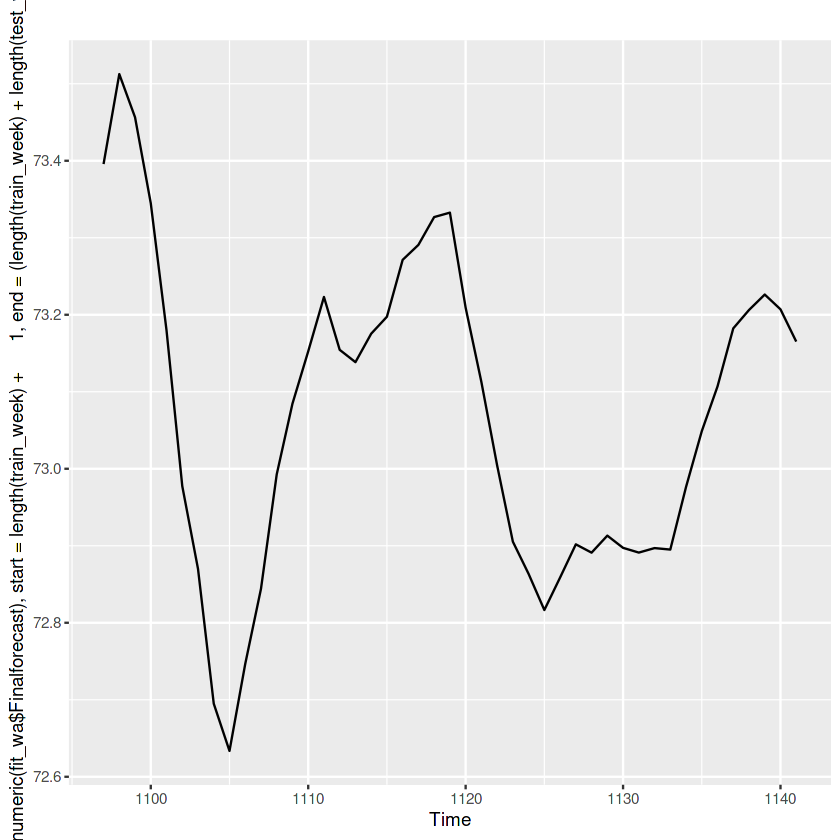

In [52]:
#WaveletArima -- Advanced
fit_wa <- WaveletFittingarma(train, Waveletlevels = floor(log(length(train))), boundary = 'periodic', FastFlag = TRUE, MaxARParam = 5, MaxMAParam = 5, NForecast = length(test))
autoplot(ts(as.numeric(fit_wa$Finalforecast), start = length(train_week)+1, end = (length(train_week) + length(test_week))))

a15<-forecast::accuracy(fit_wa$Finalforecast, test);a15
smape(test,fit_wa$Finalforecast)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.6689315,1.047683,0.8280607,0.8953731,1.114252,0.8463217,2.428836


[1] 0.01123643

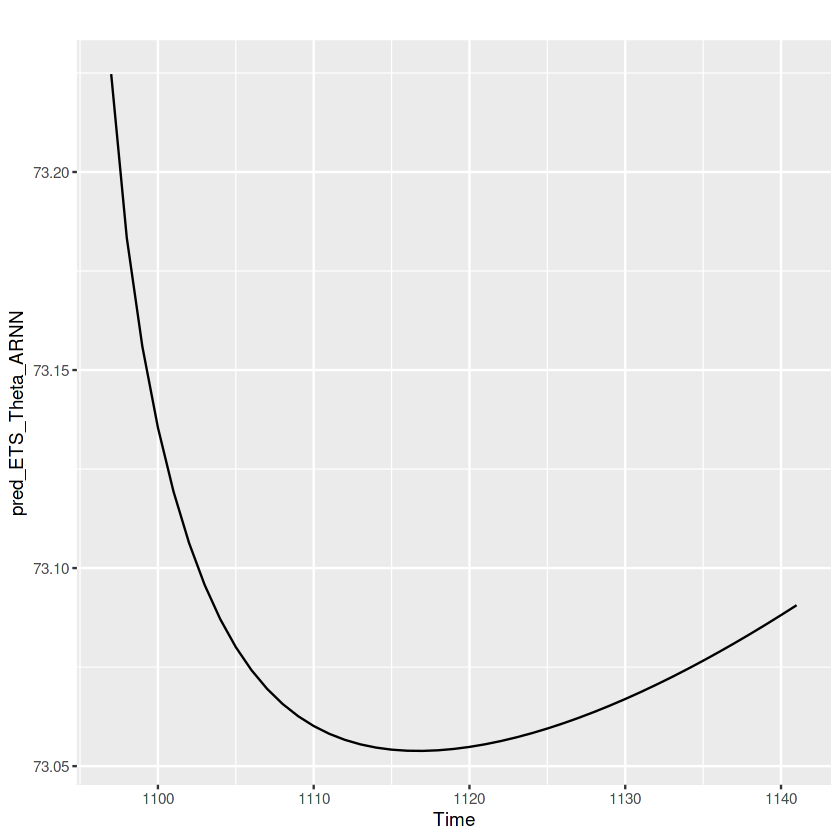

In [53]:
#ANN+ARNN+WARIMA
pred_ANN_ARNN_WARIMA = ((0.333*predANN$mean) + (0.333*fit_wa$Finalforecast) + (0.333*predARNN$mean))
autoplot(pred_ETS_Theta_ARNN)

a14<-forecast::accuracy(pred_ETS_Theta_ARNN, test);a14
smape(test,pred_ETS_Theta_ARNN)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.8880882,1.210863,0.958013,1.192707,1.288753,0.8462208,2.808813


[1] 0.01301925

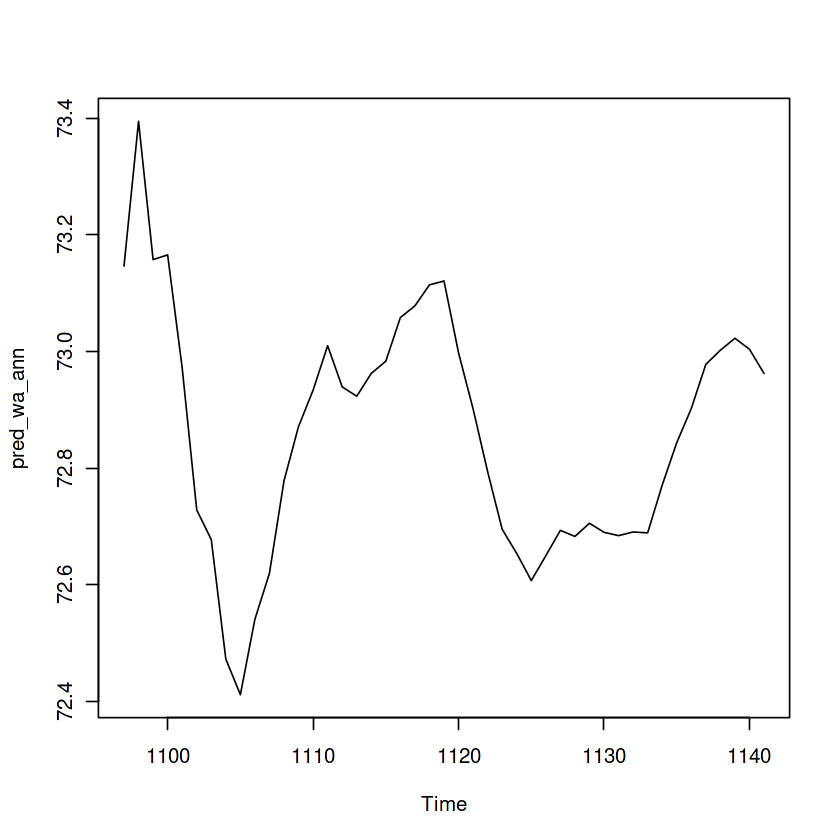

In [54]:
#fitting WARIMA+ANN hybrid model
res_wa = train - fit_wa$FinalPrediction
fit_wa_ANN=mlp(res_wa)
pred_wa_ANN = forecast::forecast(fit_wa_ANN, h=length(test))
pred_wa_ann=fit_wa$Finalforecast+pred_wa_ANN$mean
a16<-forecast::accuracy(pred_wa_ann, test);a16
plot(pred_wa_ann)

smape(test,pred_wa_ann)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.5991451,1.038837,0.8601145,0.8004616,1.158891,0.8415494,2.411122


[1] 0.01167486

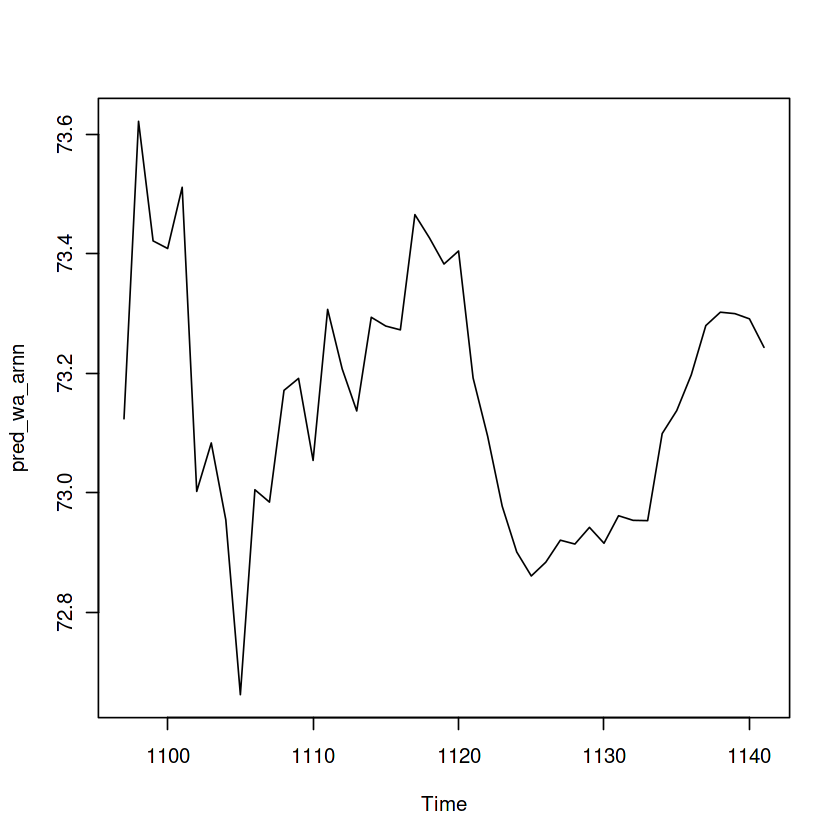

In [55]:
#fitting WARIMA + ARNN hybrid model
fit_wa_ARNN = nnetar(res_wa)
pred_wa_ARNN = forecast::forecast(fit_wa_ARNN, h=length(test))
pred_wa_arnn=fit_wa$Finalforecast+pred_wa_ARNN$mean
a17<-forecast::accuracy(pred_wa_arnn, test);a17
plot(pred_wa_arnn)

smape(test,pred_wa_arnn)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.03565389,0.634749,0.5364638,-0.05659255,0.7271906,0.766057,1.484226


[1] 0.007270772

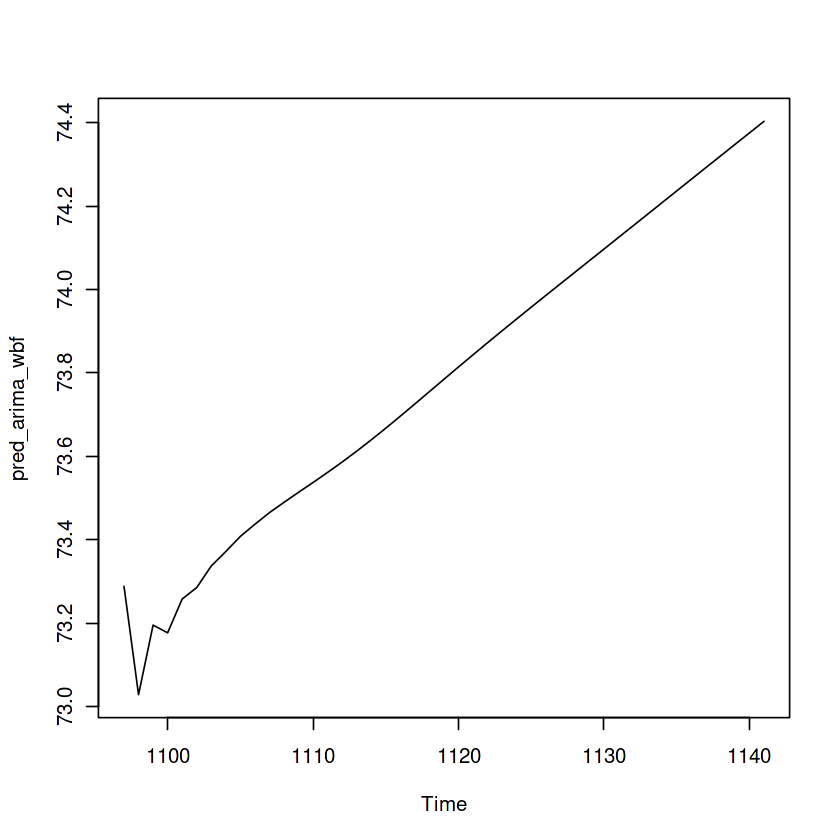

In [56]:
#fitting ARIMA + WARIMA hybrid model
fit_res_wbf=WaveletFittingarma(fitARIMA$residuals, Waveletlevels = floor(log(length(train))), boundary = 'periodic', FastFlag = TRUE, MaxARParam = 5, MaxMAParam = 5, NForecast = length(test))

pred_arima_wbf=predARIMA$mean+fit_res_wbf$Finalforecast
a18<-forecast::accuracy(pred_arima_wbf, test);a18
plot(pred_arima_wbf)

smape(test,pred_arima_wbf)

=-=-=-=-= Iteration 0 Fri Dec 17 09:55:39 2021 =-=-=-=-=
=-=-=-=-= Iteration 900 Fri Dec 17 09:55:47 2021 =-=-=-=-=
=-=-=-=-= Iteration 1800 Fri Dec 17 09:55:54 2021 =-=-=-=-=
=-=-=-=-= Iteration 2700 Fri Dec 17 09:56:02 2021 =-=-=-=-=
=-=-=-=-= Iteration 3600 Fri Dec 17 09:56:10 2021 =-=-=-=-=
=-=-=-=-= Iteration 4500 Fri Dec 17 09:56:18 2021 =-=-=-=-=
=-=-=-=-= Iteration 5400 Fri Dec 17 09:56:26 2021 =-=-=-=-=
=-=-=-=-= Iteration 6300 Fri Dec 17 09:56:33 2021 =-=-=-=-=
=-=-=-=-= Iteration 7200 Fri Dec 17 09:56:41 2021 =-=-=-=-=
=-=-=-=-= Iteration 8100 Fri Dec 17 09:56:49 2021 =-=-=-=-=


,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.7948806,1.276898,1.036596,1.063689,1.395879,0.8853519,2.959512


[1] 0.01409617

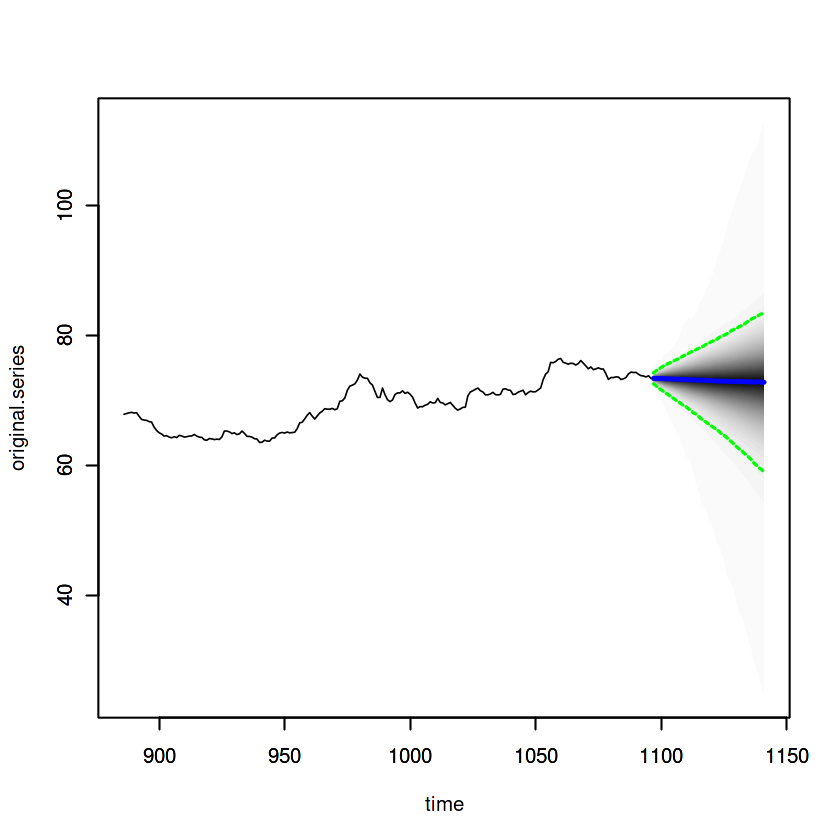

In [57]:
#fitting BSTS model -- Advanced
ss <- AddLocalLinearTrend(list(), train)
fit_bsts=bsts(train,state.specification = ss, niter = 9000)
predBSTS <- predict(fit_bsts, horizon = length(test))
plot(predBSTS, plot.original = 211)

burn <- SuggestBurn(0.1, fit_bsts)
fitted_bsts=as.numeric(-colMeans(fit_bsts$one.step.prediction.errors[-(1:burn),])+train)

a19<-forecast::accuracy(predBSTS$mean, test);a19
smape(test,predBSTS$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.3744127,0.8803328,0.7264339,0.4960968,0.9797012,0.8459476,2.042804


[1] 0.009848163

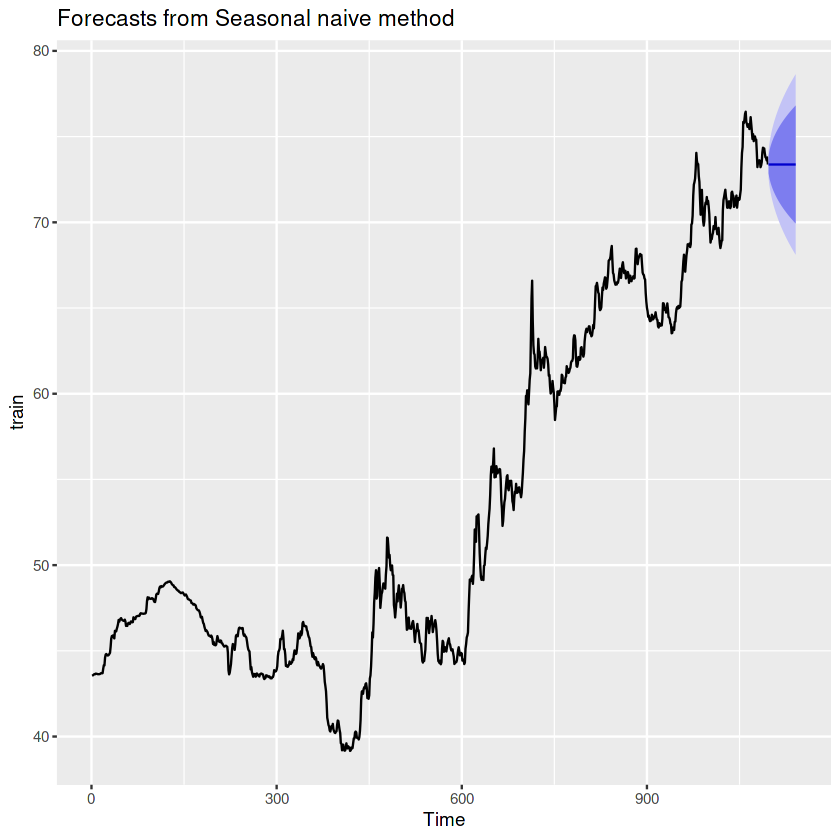

In [58]:
#Snaive - ARIMA(0,0,0)(0,1,0)m  --  Classical
fit_snaive = snaive(train, h=length(test))
autoplot(fit_snaive)

a20<-forecast::accuracy(fit_snaive$mean, test);a20
smape(test,fit_snaive$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.3743717,0.8803154,0.7264275,0.4960411,0.979693,0.8459476,2.042764


[1] 0.009848076

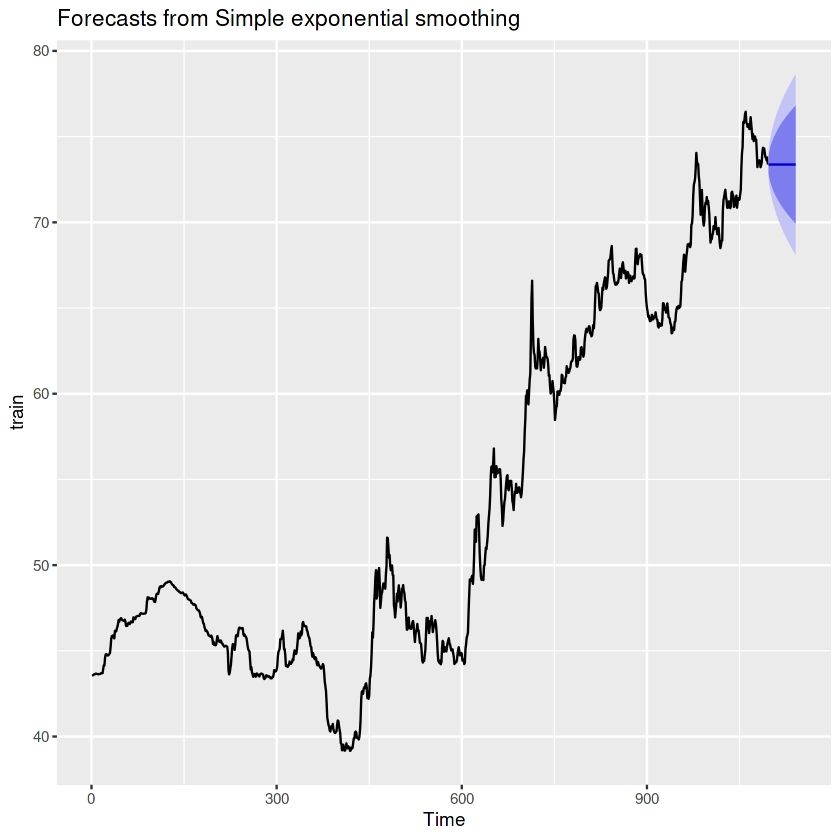

In [59]:
#Ses --  Simple exponential smoothing
fit_ses = ses(train, h=length(test))
autoplot(fit_ses)

a21<-forecast::accuracy(fit_ses$mean, test);a21
smape(test,fit_ses$mean)

In [60]:
#Dynamic regression ARIMA model is discussed in paper 2, 
#but in the fourier, the K (wavenumber) must not be greater than period/2 ,period here is 1 
#m1
xreg <- fourier(train, K=1)
model <- auto.arima(train, xreg = xreg, seasonal = FALSE)
xreg1 <- fourier(train, K=1, h = length(test))
Pred1 <- forecast(model, xreg = xreg1)
autoplot(Pred1)

a22<-forecast::accuracy(Pred1, test);a22
smape(test,Pred$mean)

ERROR: Error in ...fourier(x, K, 1:NROW(x)): K must be not be greater than period/2


**Catboost**

In [61]:
# Importing Catboost
failed_loading_catboost = FALSE
tryCatch(library(catboost), error = function(err) {failed_loading_catboost<<-TRUE})

In [62]:
if(lag == 0){
    lag = 1
}

In [63]:
# Initializing Catboost parameters
embedded_series <- NULL
series_means <- NULL
mean <- mean(train)
train_cat <- train/mean
series_means <- c(series_means, mean)
embedded <- embed(train_cat, lag + 1)
embedded_series <- rbind(embedded_series, embedded)

final_lags <- NULL
current_series_final_lags <- t(as.matrix(rev(tail(train_cat, lag))))
final_lags_cat <- rbind(final_lags, current_series_final_lags)

In [64]:
# Fitting the CatBoost model
if (failed_loading_catboost) stop("Error when loading catboost, cannot run global model based on catboost")
    train_pool <- catboost.load_pool(data = as.matrix(embedded_series[,-1]),label=as.matrix(embedded_series[,1]))
    model_cat <- catboost.train(train_pool)

Training catboost with default parameters! See help(catboost.train).



Learning rate set to 0.039666
0:	learn: 0.1880497	total: 50.5ms	remaining: 50.4s
1:	learn: 0.1811613	total: 51.5ms	remaining: 25.7s
2:	learn: 0.1744414	total: 52.1ms	remaining: 17.3s
3:	learn: 0.1678422	total: 52.7ms	remaining: 13.1s
4:	learn: 0.1615464	total: 53.3ms	remaining: 10.6s
5:	learn: 0.1554837	total: 54.1ms	remaining: 8.96s
6:	learn: 0.1497393	total: 54.9ms	remaining: 7.78s
7:	learn: 0.1441077	total: 55.5ms	remaining: 6.88s
8:	learn: 0.1386881	total: 56.1ms	remaining: 6.17s
9:	learn: 0.1334716	total: 56.9ms	remaining: 5.63s
10:	learn: 0.1284886	total: 57.5ms	remaining: 5.17s
11:	learn: 0.1236714	total: 58.2ms	remaining: 4.79s
12:	learn: 0.1191838	total: 58.8ms	remaining: 4.46s
13:	learn: 0.1147428	total: 59.5ms	remaining: 4.19s
14:	learn: 0.1105033	total: 60.2ms	remaining: 3.95s
15:	learn: 0.1064925	total: 60.9ms	remaining: 3.74s
16:	learn: 0.1026407	total: 61.5ms	remaining: 3.55s
17:	learn: 0.0988361	total: 62.2ms	remaining: 3.39s
18:	learn: 0.0951685	total: 62.8ms	remaining

In [65]:
# Predictions in Catboost model
predictions <- NULL
for (i in 1:length(test)){
    catboost_final_lags <- catboost.load_pool(final_lags_cat)
    new_predictions <- catboost.predict(model_cat, catboost_final_lags)
    predictions <- cbind(predictions, new_predictions)
    if(i < length(test)){
      final_lags_cat <- final_lags_cat[-lag]
      final_lags_cat <- cbind(new_predictions, final_lags_cat)
      colnames(final_lags_cat)[1:lag] <- paste("Lag", 1:lag, sep="")
      final_lags_cat <- as.data.frame(final_lags_cat)
    }
  }

pred = list()
for(i in 1:length(test)){
    pred[i] <- predictions[i]
}
pred = as.numeric(pred)
predictions_cat <- pred * as.vector(series_means)

In [66]:
# Catboots Accuracy
smape(test,predictions_cat)
a23<-forecast::accuracy(predictions_cat,test);a23

[1] 0.009927027

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.4060483,0.8942462,0.7322199,0.5389989,0.9871648,0.8459476,2.07486


**Pool regression**

In [67]:
# Initializing Pool regression paramters
final_lags_poolreg <- final_lags
current_series_final_lags <- t(as.matrix(rev(tail(train_cat, lag))))
final_lags_poolreg <- rbind(final_lags_poolreg, current_series_final_lags)
colnames(final_lags_poolreg)[1:lag] <- paste("Lag", 1:lag, sep="")

embedded_series <- as.data.frame(embedded_series)
colnames(embedded_series)[1] <- "y"
colnames(embedded_series)[2:(lag + 1)] <- paste("Lag", 1:lag, sep = "")

formula <- "y ~ "
  for(predictor in 2:ncol(embedded_series)){
    if(predictor != ncol(embedded_series)){
      formula <- paste0(formula, colnames(embedded_series)[predictor], " + ")
    }else{
      formula <- paste0(formula, colnames(embedded_series)[predictor])
    }
  }

formula <- paste(formula, "+ 0", sep="")
formula <- as.formula(formula)

In [68]:
# Fitting Pool Regression model
model_pool_reg <- glm(formula = formula, data = embedded_series)

In [69]:
# Predictions in Pool regression model
predictions <- NULL
for (i in 1:length(test)){
    new_predictions <- predict.glm(object = model_pool_reg, newdata = as.data.frame(final_lags_poolreg))
    predictions <- cbind(predictions, new_predictions)
    if(i < length(test)){
      final_lags_poolreg <- final_lags_poolreg[-lag]
      final_lags_poolreg <- cbind(new_predictions, final_lags_poolreg)
      colnames(final_lags_poolreg)[1:lag] <- paste("Lag", 1:lag, sep="")
      final_lags_poolreg <- as.data.frame(final_lags_poolreg)
    }
  }

pred = list()
for(i in 1:length(test)){
    pred[i] <- predictions[i]
}
pred <- as.numeric(pred)
predictions_poolreg <- pred * as.vector(series_means)

In [70]:
# Pool regression model accuracy
smape(test,predictions_poolreg)
a24 <- forecast::accuracy(test,predictions_poolreg); a24

[1] 0.008727665

,ME,RMSE,MAE,MPE,MAPE
Test set,0.4823176,0.7831501,0.6441608,0.6499542,0.8682327
